# COVID-19 Dataset Analysis
*Authors: Yin Deng, Basant Apruva, Yatin Agarwal*
***
### Index
0. Introduction
1. Import Data
2. Data Cleaning
3. Visualizations
4. Modeling
5. Side Experiments

***
## 0. Introduction
### Questions we set out with -
1. Is there any correlation between the demographics of the population and how likely these people are to contract COVID-19?
2. Understand how COVID-19 spread geographically over from January to April
3. Better understand its spread/growth trends to try to predict when it might be safe for people to go out again.
4. Quantify the risk of someone getting Coronavirus by not staying indoors/leaving their homes depending on where they live and where they're going.
5. Under what environmental factors does COVID spread vs. die?

### Main Goals/Questions we were able to address in this notebook -
1. Study how various features such as health, age demographics, mobility and county policies affect Covid-19 stats.
2. Predict ratio of affected people to total population in counties based on these features.
3. Visualize how confirmed cases have mapped across the country.
4. Relation between policies of states and their number of cases.

### Workflow adopted -
1. List out questions as a group.
2. Figure out and load datasets to use.
3. Clean up data and stick to useful columns.
4. Build visualizations to test hypotheses and study relationships between variables.
5. Create prediction models and understand how actual data behaves based on visually observed relations.
6. Analyze prediction model's accuracy.
7. List out some cool extra things we worked on but didn't end up using.

In [1]:
# Install and update libraries
import subprocess
import sys

def update(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])

update('numpy')
update('pandas')
update('matplotlib')
update('geopandas')
update('seaborn')

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
install('mapclassify')
install('pysal')

In [2]:
# imported the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

***
## 1. Import Data
In this section we import 3 datasets created by Johns Hopkins University -
1. time_series.csv (): A dataset for daily confirmed covid-19 cases in American counties
2. abridge_couties.csv (): A dataset that contains demographic information related to health and policies for American counties.
3. VMT-Map-Data-5-5-2020.csv (): A dataset that describes mobility of people in American counties in January.

In [3]:
# loaded the datasets
confirmed = pd.read_csv(r"data/time_series.csv")
demographics = pd.read_csv(r"data/abridged_couties.csv")
vmt = pd.read_csv(r'data/VMT-Map-Data-5-5-2020.csv')
states = pd.read_csv(r"data/4.18states.csv")

#load the world map
states_map = gpd.read_file(r"data/us_map/states.shp")

In [4]:
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66


In [5]:
demographics.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

In [6]:
vmt.head()

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt
0,1,1,Alabama,Autauga,2020-03-01,3890000,3571446
1,1,1,Alabama,Autauga,2020-03-02,3630000,3571446
2,1,1,Alabama,Autauga,2020-03-03,3570000,3571446
3,1,1,Alabama,Autauga,2020-03-04,3480000,3571446
4,1,1,Alabama,Autauga,2020-03-05,3970000,3571446


***
## 2. Data Cleaning
In this section we clean up our datasets and filter features that we find interesting for answering our questions.
We also merge different datasets into one dataframe with the county name as the key.

### 2.1 Clean Confirmed

In [7]:
# Select and rename columns
confirmed_clean = confirmed.iloc[:, 10:]
confirmed_clean = confirmed_clean.rename(columns = {'Combined_Key': 'combined_key'})
confirmed_clean.head()

,combined_key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145
2,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
3,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757
4,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66


In [8]:
print("\nTotal number of missing values:", confirmed_clean.isnull().sum().values.sum())


Total number of missing values: 0


### 2.2 Clean Demographics
#### 2.2.1 Create Clean_demographics
This includes counties and the following features -
1. Population Estimate 2018 
2. Population Density per SqMile 2010
3. Population Estimate 65+ 2017
4. Median Age 2010
5. Resp Mortality Rate 2014

We picked them as we believed these features would most be most linked to more cases in a county. It was also helpful that they didn't contain a lot of nan values - so we didn't have to lose a lot of data to use them.

In [9]:
demographics.StateName.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'MP', 'GU', 'PR',
       'VI'], dtype=object)

In [10]:
#clean state names and create county key
state_dictionary = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 
                    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 
                    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
                    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
                    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'MIssissippi', 'MO': 'Missouri', 'MT': 'Montana', 
                    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
                    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 
                    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 
                    'AS': 'American Samoa', 'MP': 'Northern Mariana Islands', 'GU': 'Guam', 'PR': 'Puerto Rico', 
                    'VI': 'Virgin Islands'}
demographics['State'] = demographics['StateName'].apply(lambda x: state_dictionary.get(x))
demographics['combined_key'] = demographics['CountyName'] + ', ' + demographics['State'] + ', US'
demographics.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,combined_key
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,"Autauga, Alabama, US"
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN,"Baldwin, Alabama, US"
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0,"Barbour, Alabama, US"
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519

In [11]:
#select interesting featuers
demographics_clean = demographics.loc[:, ['combined_key', 'PopulationEstimate2018', 'PopulationDensityperSqMile2010', 
                                          'PopulationEstimate65+2017', 'MedianAge2010', 'RespMortalityRate2014', 
                                          'Smokers_Percentage']]
demographics_clean.head()

,combined_key,PopulationEstimate2018,PopulationDensityperSqMile2010,PopulationEstimate65+2017,MedianAge2010,RespMortalityRate2014,Smokers_Percentage
0,"Autauga, Alabama, US",55601.0,91.8,8392.0,37.0,81.79,18.081557
1,"Baldwin, Alabama, US",218022.0,114.7,42413.0,41.1,54.28,17.489033
2,"Barbour, Alabama, US",24881.0,31.0,4757.0,39.0,69.82,21.999985
3,"Bibb, Alabama, US",22400.0,36.8,3632.0,37.8,84.49,19.114200
4,"Blount, Alabama, US",57840.0,88.9,10351.0,39.0,87.05,19.208672


In [12]:
print("\nTotal number of missing values for demographics_clean:\n", demographics_clean.isnull().sum().values.sum())
print("\nMissing values per column for demographics_clean:\n", demographics_clean.isnull().sum())


Total number of missing values for demographics_clean:
 290

Missing values per column for demographics_clean:
 combined_key                        0
PopulationEstimate2018             23
PopulationDensityperSqMile2010     19
PopulationEstimate65+2017          23
MedianAge2010                      19
RespMortalityRate2014             103
Smokers_Percentage                103
dtype: int64


In [13]:
demographics_clean.dropna(inplace = True)

#### 2.2.2 Create Clean_demographics_policy
This includes counties and the following features -
1. stay at home	- Date that stay at home policy was introduced for a county 
2. more than 50 gatherings - Date that >50 gatherings were prohibited for a county
3. more than 500 gatherings -  Date that >500 gatherings were prohibited for a county

We use these features as we want to study how early state/county level actions helped prevent widespread cases.

In [14]:
# function coverts a list of column's gregorian ordinal dates to python's datetime format
from datetime import date
def greg_to_date(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: date.fromordinal(int(x)))
    return df

In [15]:
demographics_clean_policy = demographics.loc[:, ['combined_key', 'State', 'PopulationEstimate2018', 'stay at home', 
                                                 '>50 gatherings', '>500 gatherings']]

In [16]:
print("\nTotal number of missing values for demographics_clean_policy:\n", demographics_clean_policy.isnull().sum().values.sum())
print("\nMissing values per column for demographics_clean_policy:\n", demographics_clean_policy.isnull().sum())


Total number of missing values for demographics_clean_policy:
 1057

Missing values per column for demographics_clean_policy:
 combined_key                0
State                       0
PopulationEstimate2018     23
stay at home              592
>50 gatherings            221
>500 gatherings           221
dtype: int64


In [17]:
demographics_clean_policy.dropna(inplace = True)
demographics_clean_policy = greg_to_date(demographics_clean_policy, ['stay at home', '>50 gatherings', '>500 gatherings'])
demographics_clean_policy.head()

,combined_key,State,PopulationEstimate2018,stay at home,>50 gatherings,>500 gatherings
0,"Autauga, Alabama, US",Alabama,55601.0,2020-04-04,2020-03-20,2020-03-13
1,"Baldwin, Alabama, US",Alabama,218022.0,2020-04-04,2020-03-20,2020-03-13
2,"Barbour, Alabama, US",Alabama,24881.0,2020-04-04,2020-03-20,2020-03-13
3,"Bibb, Alabama, US",Alabama,22400.0,2020-04-04,2020-03-20,2020-03-13
4,"Blount, Alabama, US",Alabama,57840.0,2020-04-04,2020-03-20,2020-03-13


### 2.3 Merge Clean Confirmed and Demographics

In [18]:
data = demographics_clean.merge(confirmed_clean, on = 'combined_key')
dates = list(data.columns.values)[7:]
for date in dates:
    data[date] = data[date] / data['PopulationEstimate2018'] * 100
data['ElderlyRatio'] = data['PopulationEstimate65+2017'] / data['PopulationEstimate2018']
data.drop(columns = ['PopulationEstimate65+2017', 'PopulationEstimate2018'], inplace = True)
data.head()

,combined_key,PopulationDensityperSqMile2010,MedianAge2010,RespMortalityRate2014,Smokers_Percentage,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,ElderlyRatio
0,"Autauga, Alabama, US",91.8,37.0,81.79,18.081557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001799,0.007194,0.010791,0.010791,0.010791,0.010791,0.010791,0.012590,0.014388,0.017985,0.021582,0.021582,0.021582,0.021582,0.021582,0.021582,0.026978,0.030575,0.034172,0.034172,0.034172,0.041366,0.043165,0.046762,0.046762,0.044963,0.046762,0.050359,0.053956,0.057553,0.059351,0.064747,0.064747,0.066546,0.070143,0.071941,0.077337,0.079135,0.075538,0.080934,0.150933
1,"Baldwin, Alabama, US",114.7,41.1,54.28,17.489033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000459,0.000459,0.000459,0.000459,0.000459,0.000917,0.000917,0.000917,0.001376,0.001835,0.001835,0.002293,0.002293,0.004587,0.006880,0.008256,0.008715,0.009173,0.011008,0.012843,0.013301,0.013301,0.017429,0.019264,0.020181,0.025685,0.027061,0.030272,0.032566,0.033024,0.039904,0.041739,0.046326,0.047243,0.049995,0.051371,0.053664,0.056416,0.060544,0.065590,0.067424,0.067424,0.073846,0.077056,0.078432,0.079808,0.079808,0.080267,0.083019,0.194535
2,"Barbour, Alabama, US",31.0,39.0,69.82,21.999985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004019,0.008038,0.008038,0.008038,0.012057,0.012057,0.016077,0.036172,0.036172,0.040191,0.040191,0.044210,0.048230,0.056268,0.060287,0.072344,0.080383,0.088421,0.112536,0.116555,0.120574,0.128612,0.128612,0.132631,0.140670,0.148708,0.148708,0.156746,0.168804,0.172823,0.191190
3,"Bibb, Alabama, US",36.8,37.8,84.49,19.114200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.013393,0.013393,0.017857,0.017857,0.017857,0.022321,0.031250,0.035714,0.040179,0.040179,0.049107,0.058036,0.071429,0.075893,0.075893,0.080357,0.098214,0.107143,0.116071,0.125000,0.142857,0.142857,0.151786,0.147321,0.151786,0.151786,0.169643,0.187500,0.187500,0.187500,0.187500,0.187500,0.187500,0.162143
4,"Blount, Alabama, US",88.9,39.0,87.05,19.208672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### 2.4 Merge Clean Confirmed and Demographic Policies

In [19]:
data_policy = demographics_clean_policy.merge(confirmed_clean, on = 'combined_key')
dates = list(data_policy.columns.values)[6:]
data_policy.head()

,combined_key,State,PopulationEstimate2018,stay at home,>50 gatherings,>500 gatherings,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
0,"Autauga, Alabama, US",Alabama,55601.0,2020-04-04,2020-03-20,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45
1,"Baldwin, Alabama, US",Alabama,218022.0,2020-04-04,2020-03-20,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181
2,"Barbour, Alabama, US",Alabama,24881.0,2020-04-04,2020-03-20,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43
3,"Bibb, Alabama, US",Alabama,22400.0,2020-04-04,2020-03-20,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42
4,"Blount, Alabama, US",Alabama,57840.0,2020-04-04,2020-03-20,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40


### 2.5 Clean VMT

In [20]:
vmt['county_vmt'] = vmt['county_vmt'] / vmt['jan_avg_vmt']
vmt['combined_key'] = vmt['county_name'] + ', ' + vmt['state_name'] + ', US'
vmt.head()

,statefp10,countyfp10,state_name,county_name,ref_dt,county_vmt,jan_avg_vmt,combined_key
0,1,1,Alabama,Autauga,2020-03-01,1.089195,3571446,"Autauga, Alabama, US"
1,1,1,Alabama,Autauga,2020-03-02,1.016395,3571446,"Autauga, Alabama, US"
2,1,1,Alabama,Autauga,2020-03-03,0.999595,3571446,"Autauga, Alabama, US"
3,1,1,Alabama,Autauga,2020-03-04,0.974395,3571446,"Autauga, Alabama, US"
4,1,1,Alabama,Autauga,2020-03-05,1.111595,3571446,"Autauga, Alabama, US"


In [21]:
vmt_cleaned = vmt.pivot_table(index = 'combined_key', columns = 'ref_dt', values = 'county_vmt')
vmt_cleaned = vmt_cleaned.reset_index().rename_axis(None, axis = 1)
vmt_cleaned.head()

,combined_key,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,"Abbeville, South Carolina, US",1.141819,1.090218,1.045204,1.021050,1.471190,1.394337,1.361400,1.185736,1.081435,1.141819,1.251610,1.130840,1.493149,1.108882,0.989211,0.895889,0.753162,0.669721,0.761945,0.648861,0.377679,0.292042,0.455630,0.473196,0.566518,0.636784,0.776218,0.498448,0.427084,0.582987,0.534679,0.665329,0.625805,0.625805,0.578595,0.429280,0.505036,0.647763,0.552245,0.566518,0.600553,0.489665,0.341448,0.478686,0.545658,0.603847,0.677406,0.760847,0.547854,0.372189,0.547854,0.664232,0.652155,0.572008,0.681798,0.631294,0.509427,0.641176,0.698267,0.753162,0.671917,0.890400
1,"Acadia, Louisiana, US",1.139893,0.975431,1.049155,0.966924,1.100195,1.468818,1.346889,1.097360,0.995280,0.986773,1.199440,1.114373,1.182427,0.972595,0.825147,0.887529,0.810969,0.765600,0.774107,0.538756,0.269378,0.254349,0.555769,0.544427,0.544427,0.533084,0.578453,0.431004,0.379964,0.513236,0.544427,0.555769,0.555769,0.564276,0.422498,0.331760,0.465031,0.501893,0.572782,0.638000,0.465031,0.479209,0.259737,0.482044,0.598302,0.652178,0.629493,0.706053,0.584124,0.385636,0.601138,0.711724,0.745751,0.683369,0.816640,0.762764,0.564276,0.745751,0.703218,0.586960,0.805298,0.927227
2,"Accomack, Virginia, US",1.329607,1.031554,1.196647,1.362848,1.240967,1.252047,1.329607,1.074766,0.996098,1.285287,1.218807,1.218807,1.484728,1.296367,0.876433,0.914105,0.828789,0.734608,0.778928,0.735716,0.440986,0.473119,0.490847,0.590567,0.442094,0.513007,0.634888,0.475335,0.406638,0.475335,0.476443,0.421042,0.438770,0.511899,0.352346,0.290298,0.452067,0.488631,0.507467,0.546247,0.544031,0.448743,0.294730,0.329078,0.509683,0.576163,0.592783,0.668128,0.417718,0.364534,0.415502,0.567299,0.563975,0.624916,0.651508,0.505251,0.387802,0.495279,0.542923,0.588351,0.518547,0.596107
3,"Ada, Idaho, US",1.158908,0.982553,0.864982,1.016144,1.217693,1.410845,1.041338,1.024542,0.906972,0.923767,0.999348,0.999348,1.133714,0.834750,0.660914,0.630681,0.617245,0.576095,0.524028,0.511431,0.319120,0.324158,0.346833,0.331716,0.335915,0.293926,0.309882,0.276290,0.225903,0.230942,0.270412,0.236820,0.242699,0.272931,0.220864,0.205748,0.214986,0.251937,0.284688,0.290567,0.330877,0.274611,0.172157,0.231782,0.265373,0.261174,0.267893,0.358590,0.347672,0.276290,0.277970,0.288047,0.309042,0.277130,0.379584,0.394701,0.333396,0.287208,0.348512,0.352711,0.374546,0.482039
4,"Adair, Iowa, US",1.017601,1.279229,0.995919,1.037838,1.279229,1.091320,1.604457,0.849928,0.899074,0.985801,1.178047,1.088429,1.046510,1.079756,0.644674,0.949665,0.771874,0.808010,0.633110,0.547828,0.335346,0.309328,0.516028,0.568064,0.572401,0.625883,0.575292,0.393164,0.302100,0.516028,0.595528,0.633110,0.562283,0.417737,0.355582,0.304991,0.536264,0.507355,0.650455,0.572401,0.581073,0.455319,0.153218,0.456764,0.560837,0.527592,0.449537,0.549273,0.529037,0.370037,0.573846,0.625883,0.828247,0.607092,0.682255,0.500128,0.406173,0.569510,0.672137,0.682255,0.695265,0.942438


In [22]:
# There are counties who only have vmt data for a couple of days, so when we apply pivot table, 
# a lot of NULL values show up. 
vmt_cleaned.dropna(inplace=True)

### 2.6 Merge Cleaned VMT, Confirmed, Deaths and Demographics

In [23]:
all_data = data.merge(vmt_cleaned, on = 'combined_key')
all_data.head()

,combined_key,PopulationDensityperSqMile2010,MedianAge2010,RespMortalityRate2014,Smokers_Percentage,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,ElderlyRatio,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,"Autauga, Alabama, US",91.8,37.0,81.79,18.081557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001799,0.007194,0.010791,0.010791,0.010791,0.010791,0.010791,0.012590,0.014388,0.017985,0.021582,0.021582,0.021582,0.021582,0.021582,0.021582,0.026978,0.030575,0.034172,0.034172,0.034172,0.041366,0.043165,0.046762,0.046762,0.044963,0.046762,0.050359,0.053956,0.057553,0.059351,0.064747,0.064747,0.066546,0.070143,0.071941,0.077337,0.079135,0.075538,0.080934,0.150933,1.089195,1.016395,0.999595,0.974395,1.111595,1.570792,1.282394,1.145194,1.066795,0.993995,1.063995,1.178794,1.509193,1.111595,0.825996,0.817596,0.809196,0.786796,0.685997,0.615997,0.291199,0.253959,0.582397,0.562797,0.702797,0.680397,0.669197,0.498398,0.380798,0.517997,0.456398,0.515197,0.571197,0.604797,0.428398,0.259839,0.453598,0.467598,0.425598,0.523597,0.515197,0.422798,0.215599,0.467598,0.517997,0.551597,0.587997,0.635597,0.548797,0.264599,0.481598,0.610397,0.629997,0.503998,0.680397,0.545997,0.473198,0.618797,0.671997,0.587997,0.674797,0.865196
1,"Baldwin, Alabama, US",114.7,41.1,54.28,17.489033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000459,0.000459,0.000459,0.000459,0.000459,0.000917,0.000917,0.000917,0.001376,0.001835,0.001835,0.002293,0.002293,0.004587,0.006880,0.008256,0.008715,0.009173,0.011008,0.012843,0.013301,0.013301,0.017429,0.019264,0.020181,0.025685,0.027061,0.030272,0.032566,0.033024,0.039904,0.041739,0.046326,0.047243,0.049995,0.051371,0.053664,0.056416,0.060544,0.065590,0.067424,0.067424,0.073846,0.077056,0.078432,0.079808,0.079808,0.080267,0.083019,0.194535,1.307796,1.080595,1.102761,1.041804,1.130468,1.451876,1.224674,1.141551,1.019638,1.003013,1.080595,1.163717,1.374295,1.036262,0.936515,0.847851,0.759187,0.703772,0.664981,0.565234,0.320853,0.325287,0.526443,0.506494,0.495965,0.524227,0.565234,0.463824,0.343574,0.461608,0.441658,0.502061,0.497628,0.520348,0.385135,0.240502,0.366848,0.400651,0.387906,0.430575,0.448308,0.394556,0.218336,0.390676,0.455512,0.493194,0.477678,0.545839,0

### 2.7 Clean Up States Data, and map

In [24]:
#Filter for only US States
states_data = states.iloc[0:58]
states_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [25]:
#Check for discrepancies between state nomenclature 
extra_states = []
for state in states_data['Province_State']: 
    if state not in list(states_map['STATE_NAME']): 
        extra_states.append(state)
#Drop all the states not included in the maps
for i in range(len(extra_states)): 
    states_data = states_data[states_data['Province_State'] != extra_states[i]]

#Check that all states match now
all_matches = True
for state in states_data['Province_State']: 
    if state not in list(states_map['STATE_NAME']): 
        print(state + 'is not in the map')
        all_matches = false
if all_matches: 
    print('All states match!')

All states match!


In [26]:
states_data.rename(columns = {'Province_State': 'STATE_NAME'}, inplace = True)

#get polygon outlines
states_map['STATE_NAME'] = states_map['STATE_NAME'].apply(str)

states_data['STATE_NAME'] = states_data['STATE_NAME'].apply(str)
states_complete = pd.merge(states_map, states_data, on = 'STATE_NAME')
states_complete.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",US,2020-04-18 22:32:47,21.0943,-157.4983,574,9,390.0,565.0,15.0,40.542850,22343.0,48.0,1.567944,84000015,USA,1578.133984,8.362369
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",US,2020-04-18 22:32:47,47.4009,-121.4905,11776,613,NaN,11163.0,53.0,155.985844,131627.0,518.0,5.205503,84000053,USA,1743.541840,4.398777
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",US,2020-04-18 22:32:47,46.9219,-110.4544,426,10,234.0,416.0,30.0,49.192424,10569.0,55.0,2.347418,84000030,USA,1220.457120,12.910798
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",US,2020-04-18 22:32:47,44.6939,-69.3819,847,32,382.0,815.0,23.0,72.146139,14923.0,136.0,3.778040,84000023,USA,1271.117865,16.056671
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",US,2020-04-18 22:32:47,47.5289,-99.7840,528,9,183.0,519.0,38.0,87.068656,12963.0,47.0,1.704545,84000038,USA,2137.634437,8.901515


***
## 3. Visualizations
#### 3.1. How many counties of the same state started stay at home restrictions at the same time? This shows how independant county policies are in different states in comparison to other states.

In [27]:
data_policy.groupby(['State', 'stay at home']).size().unstack(fill_value=0)

stay at home,2020-03-19,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-06,2020-04-07
State,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,64,0,0
Alaska,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0
California,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Colorado,0,0,0,0,12,0,52,0,0,0,0,0,0,0,0,0,0
Connecticut,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
Delaware,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
Florida,0,0,0,0,0,4,3,2,0,2,0,0,0,53,0,0,0
Georgia,0,1,0,0,2,0,0,0,0,0,0,0,0,154,0,0,0


We see most stay at home orders for households in America were ordered by states rather than their individual counties. 

However for some states such as Texas, Pennsylvania, and Colorado, some independant counties issued the stay at home policy before it was declared by the state.

#### 3.2. How did issuing stay at home orders on different times translate to total number of cases in the county

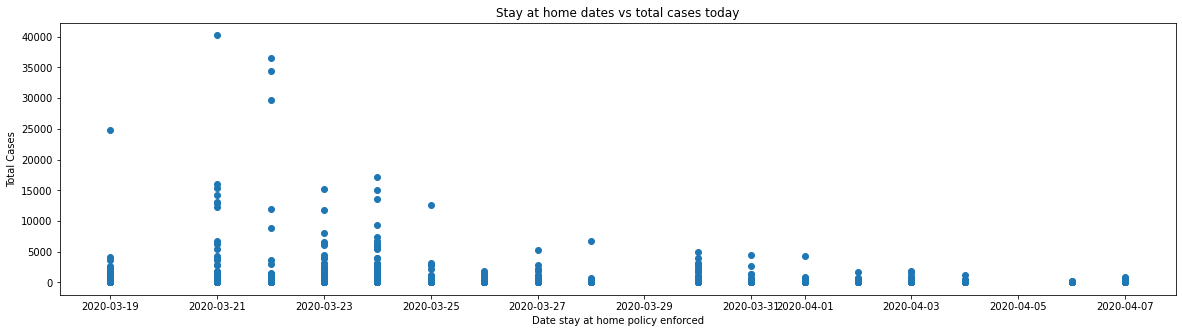

In [28]:
pd.plotting.register_matplotlib_converters()
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(data_policy["stay at home"].values, data_policy["5/2/20"])
ax.set(xlabel='Date stay at home policy enforced', ylabel='Total Cases')
ax.set_title('Stay at home dates vs total cases today')
plt.show()

We see that most of the counties that started the stay at home policy for its citizens early tend to have a greater number of cases today. This indicates a reationary response of state/county policies towards the Virus rather than a precautionary one.

#### 3.3. How do total populations and densities relate to total number of confirmed cases?

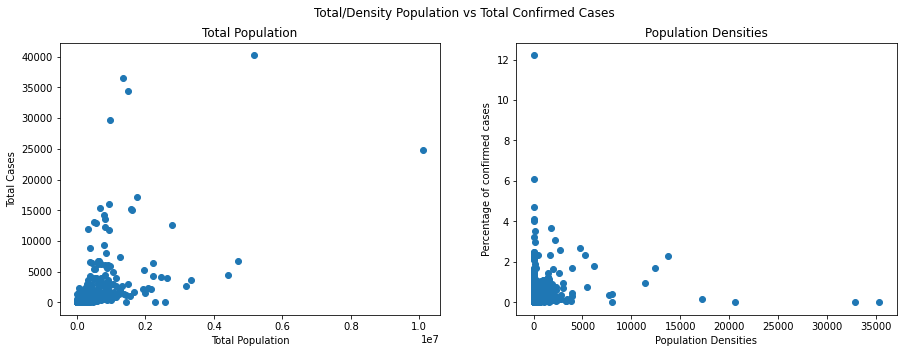

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(data_policy["PopulationEstimate2018"], data_policy["5/2/20"])
ax1.set_title('Total Population')
ax1.set(xlabel='Total Population', ylabel='Total Cases')

ax2.scatter(data["PopulationDensityperSqMile2010"], data["5/2/20"])
ax2.set_title('Population Densities')
ax2.set(xlabel='Population Densities', ylabel='Percentage of confirmed cases')

fig.suptitle('Total/Density Population vs Total Confirmed Cases')

plt.show()

It's interesting to see how that although places with greater populations have more confirmed cases generally, there isn't as clear of a relation between population densities and the total number of cases.

#### 3.4. How do general health and age demographics relate to population percentage of confirmed cases?

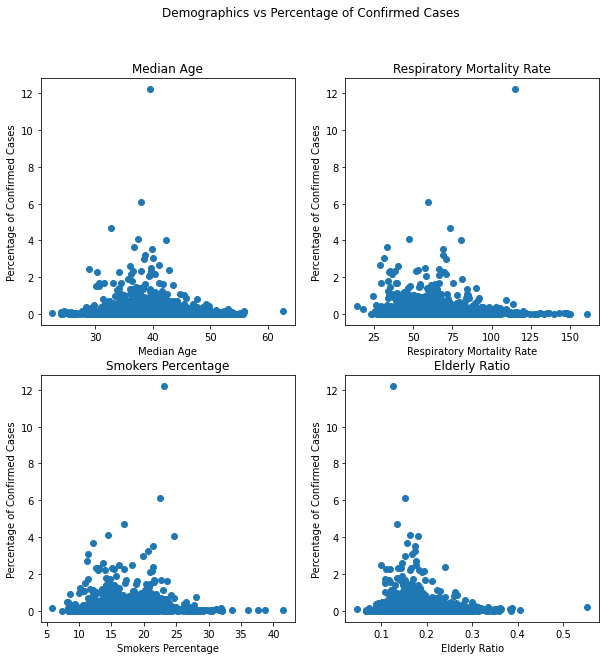

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(data['MedianAge2010'], data['5/2/20'])
axs[0, 0].set_title('Median Age')
axs[0, 0].set(xlabel='Median Age', ylabel='Percentage of Confirmed Cases')

axs[0, 1].scatter(data['RespMortalityRate2014'], data['5/2/20'])
axs[0, 1].set_title('Respiratory Mortality Rate')
axs[0, 1].set(xlabel='Respiratory Mortality Rate', ylabel='Percentage of Confirmed Cases')

axs[1, 0].scatter(data['Smokers_Percentage'], data['5/2/20'])
axs[1, 0].set_title('Smokers Percentage')
axs[1, 0].set(xlabel='Smokers Percentage', ylabel='Percentage of Confirmed Cases')

axs[1, 1].scatter(data['ElderlyRatio'], data['5/2/20'])
axs[1, 1].set_title('Elderly Ratio')
axs[1, 1].set(xlabel='Elderly Ratio', ylabel='Percentage of Confirmed Cases')

fig.suptitle('Demographics vs Percentage of Confirmed Cases')

plt.show()

#### 3.5. How has the number of confirmed cases been growing?

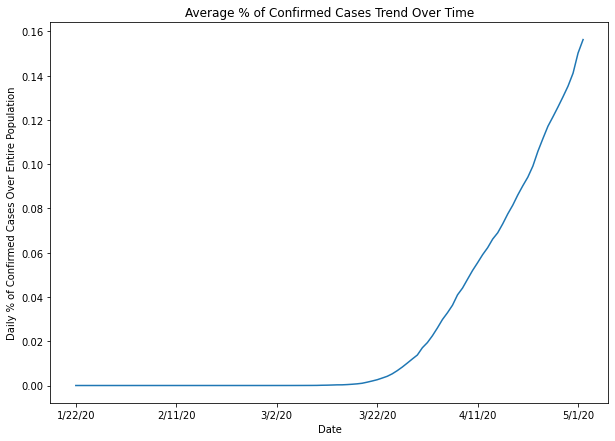

In [31]:
data_mean = data[dates].mean(axis = 0)
data_mean.plot(kind = 'line', figsize = (10, 7))
plt.xlabel("Date")
plt.ylabel("Daily % of Confirmed Cases Over Entire Population")
plt.title("Average % of Confirmed Cases Trend Over Time")
plt.show()

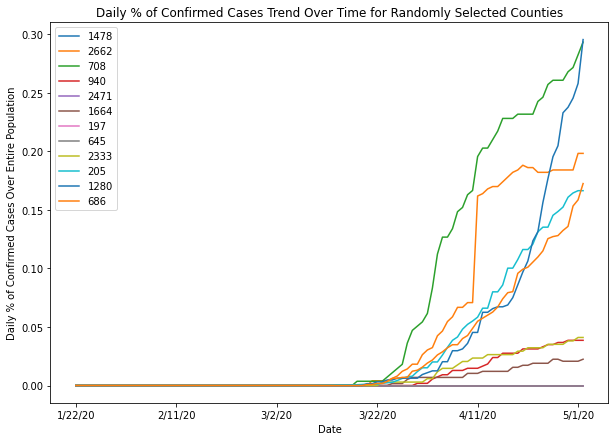

In [32]:
data[dates].sample(12).T.plot(kind = 'line', figsize = (10, 7))
plt.xlabel("Date")
plt.ylabel("Daily % of Confirmed Cases Over Entire Population")
plt.title("Daily % of Confirmed Cases Trend Over Time for Randomly Selected Counties")
plt.show()

#### 3.6. How have vehicle mobility changed over time for counties because of the virus?

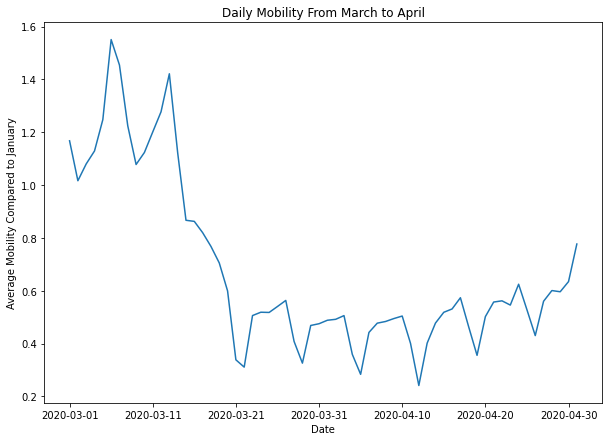

In [33]:
vmt_cleaned_mean = vmt_cleaned.iloc[:, 1:].mean(axis = 0)
vmt_cleaned_mean.plot(kind = 'line', figsize = (10, 7))
plt.xlabel("Date")
plt.ylabel("Average Mobility Compared to January")
plt.title("Daily Mobility From March to April")
plt.show()

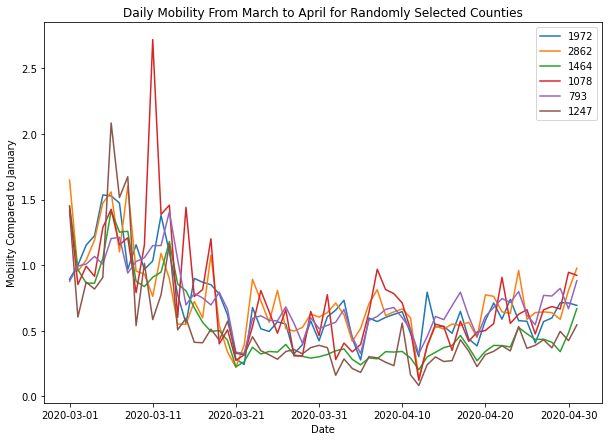

In [34]:
vmt_cleaned.iloc[:, 1:].sample(6).T.plot(kind = 'line', figsize = (10, 7))
plt.xlabel("Date")
plt.ylabel("Mobility Compared to January")
plt.title("Daily Mobility From March to April for Randomly Selected Counties")
plt.show()

#### 3.7. How do total number of cases map across states in the country

3.7.1. Total number of cases

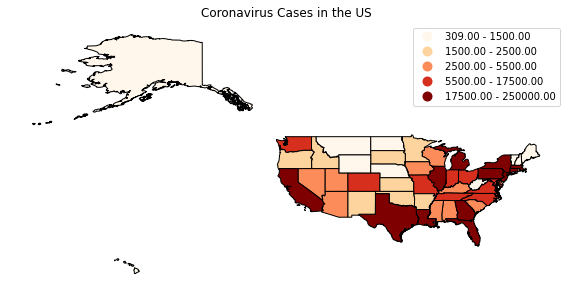

In [35]:
#boundries of colors are quantiles, rounded
cases_map = states_complete.plot(column = 'Confirmed', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined', 
                                  classification_kwds = {'bins': [1500, 2500, 5500, 17500, 250000]},
                                  figsize = (10, 10))
cases_map.set_title('Coronavirus Cases in the US')
cases_map.set_axis_off()

3.7.2. Mortality Rate

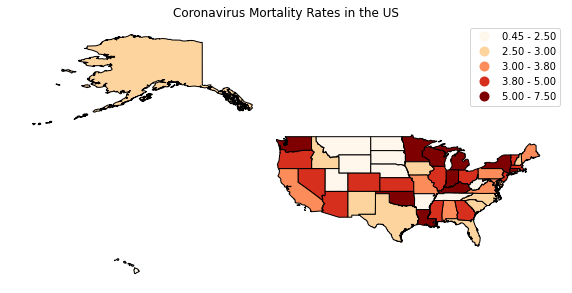

In [36]:
mortality_map = states_complete.plot(column = 'Mortality_Rate', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined',
                                  classification_kwds = {'bins': [2.5, 3, 3.8, 5.0, 7.5]},
                                  figsize = (10, 10) )
mortality_map.set_title('Coronavirus Mortality Rates in the US')
mortality_map.set_axis_off()

3.7.3. Hospitalization Rate

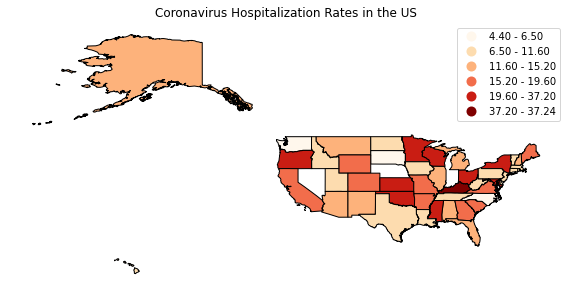

In [37]:
hsptl_map = states_complete.plot(column = 'Hospitalization_Rate', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined',
                                  classification_kwds = {'bins': [6.5, 11.6, 15.2, 19.6, 37.2]},
                                  figsize = (10, 10) )
hsptl_map.set_title('Coronavirus Hospitalization Rates in the US')
hsptl_map.set_axis_off()

***
## 4. Modeling
#### We try to model and predict total number of cases in a county on a given day

We combine all the data in this section - demographics, vehicle mobility, and cases in previous days - to predict the total number of cases on a given day (Here May 2nd 2020).

In [38]:
def residual_plot(x, y, y_hat):
    plt.scatter(np.arange(len(x)), y - y_hat)
    plt.xlabel('x')
    plt.ylabel('residual (true y - estimated y)')
    plt.title('Residual vs x for Model')
    plt.axhline(y = 0, color='r');

## 4.1 Continuous Data Modeling

In [39]:
confirmed_data = all_data.drop(columns = ['combined_key', '5/2/20'])
confirmed_data.head()

,PopulationDensityperSqMile2010,MedianAge2010,RespMortalityRate2014,Smokers_Percentage,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,ElderlyRatio,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,91.8,37.0,81.79,18.081557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001799,0.007194,0.010791,0.010791,0.010791,0.010791,0.010791,0.012590,0.014388,0.017985,0.021582,0.021582,0.021582,0.021582,0.021582,0.021582,0.026978,0.030575,0.034172,0.034172,0.034172,0.041366,0.043165,0.046762,0.046762,0.044963,0.046762,0.050359,0.053956,0.057553,0.059351,0.064747,0.064747,0.066546,0.070143,0.071941,0.077337,0.079135,0.075538,0.150933,1.089195,1.016395,0.999595,0.974395,1.111595,1.570792,1.282394,1.145194,1.066795,0.993995,1.063995,1.178794,1.509193,1.111595,0.825996,0.817596,0.809196,0.786796,0.685997,0.615997,0.291199,0.253959,0.582397,0.562797,0.702797,0.680397,0.669197,0.498398,0.380798,0.517997,0.456398,0.515197,0.571197,0.604797,0.428398,0.259839,0.453598,0.467598,0.425598,0.523597,0.515197,0.422798,0.215599,0.467598,0.517997,0.551597,0.587997,0.635597,0.548797,0.264599,0.481598,0.610397,0.629997,0.503998,0.680397,0.545997,0.473198,0.618797,0.671997,0.587997,0.674797,0.865196
1,114.7,41.1,54.28,17.489033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000459,0.000459,0.000459,0.000459,0.000459,0.000917,0.000917,0.000917,0.001376,0.001835,0.001835,0.002293,0.002293,0.004587,0.006880,0.008256,0.008715,0.009173,0.011008,0.012843,0.013301,0.013301,0.017429,0.019264,0.020181,0.025685,0.027061,0.030272,0.032566,0.033024,0.039904,0.041739,0.046326,0.047243,0.049995,0.051371,0.053664,0.056416,0.060544,0.065590,0.067424,0.067424,0.073846,0.077056,0.078432,0.079808,0.079808,0.080267,0.194535,1.307796,1.080595,1.102761,1.041804,1.130468,1.451876,1.224674,1.141551,1.019638,1.003013,1.080595,1.163717,1.374295,1.036262,0.936515,0.847851,0.759187,0.703772,0.664981,0.565234,0.320853,0.325287,0.526443,0.506494,0.495965,0.524227,0.565234,0.463824,0.343574,0.461608,0.441658,0.502061,0.497628,0.520348,0.385135,0.240502,0.366848,0.400651,0.387906,0.430575,0.448308,0.394556,0.218336,0.390676,0.455512,0.493194,0.477678,0.545839,0.422817,0.292038,0.467149,0.512590,0.517023,0.422263,0.592942,0.559693,0.466041,0.55

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
confirmed_data_mean = confirmed_data.mean(axis = 0)
confirmed_data_std = confirmed_data.std(axis = 0)
confirmed_data_normalized = (confirmed_data - confirmed_data_mean) / confirmed_data_std
confirmed_data_normalized['5/2/20'] = all_data.loc[:, ['5/2/20']]

confirmed_train, confirmed_test = train_test_split(confirmed_data_normalized, test_size = 0.2, random_state = 100)
confirmed_train_x = confirmed_train.drop(columns = ['5/2/20'])
confirmed_train_y = confirmed_train['5/2/20']
confirmed_test_x = confirmed_test.drop(columns = ['5/2/20'])
confirmed_test_y = confirmed_test['5/2/20']

### 4.1.1 Linear Regression Without Regularization

In [41]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(confirmed_train_x, confirmed_train_y)
confirmed_train_y_hat = model_1.predict(confirmed_train_x)
confirmed_train_mse = mean_squared_error(confirmed_train_y, confirmed_train_y_hat)
confirmed_train_mse

0.00018935687098730475

In [42]:
confirmed_test_y_hat = model_1.predict(confirmed_test_x)
confirmed_test_mse = mean_squared_error(confirmed_test_y, confirmed_test_y_hat)
confirmed_test_mse

2.7327066570334653e+18

#### Residual Plot for this model

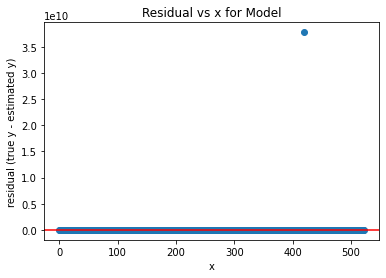

In [43]:
residual_plot(confirmed_test_x, confirmed_test_y, confirmed_test_y_hat)

### 4.1.2 Linear Regression With Ridge Regularization

In [44]:
from sklearn.linear_model import Ridge

model_2 = Ridge(alpha = 1.0)
model_2.fit(confirmed_train_x, confirmed_train_y)
confirmed_train_y_hat = model_2.predict(confirmed_train_x)
confirmed_train_mse = mean_squared_error(confirmed_train_y, confirmed_train_y_hat)
confirmed_train_mse

0.00019578893269780743

In [45]:
confirmed_test_y_hat = model_2.predict(confirmed_test_x)
confirmed_test_mse = mean_squared_error(confirmed_test_y, confirmed_test_y_hat)
confirmed_test_mse

0.00014216921534852285

#### Residual Plot for this model

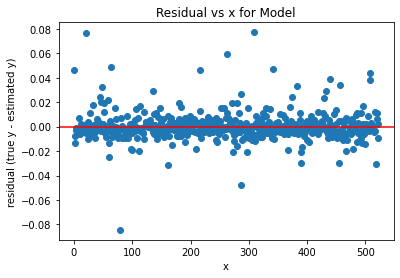

In [46]:
residual_plot(confirmed_test_x, confirmed_test_y, confirmed_test_y_hat)

When we have information about previous days (here close to 3 months of confirmed cases data), we can make a prediction with pretty high accuracy about the total number of cases in a county on a give day.

***
## 5. Side Experiments
This is some of the discarded section we were using initally but didn't find it useful enough at the end to include in the main project.

### 5.1 Dealing with Deaths Dataset

In [47]:
deaths = pd.read_csv(r"data/time_series_covid19_deaths_US.csv")

In [48]:
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3


### 5.1.1 Clean Deaths

In [49]:
print("\nTotal number of missing values:\n", deaths.isnull().sum().values.sum())
print("\nMissing values per column:\n", deaths.isnull().sum())


Total number of missing values:
 11

Missing values per column:
 UID        0
iso2       0
iso3       0
code3      0
FIPS       4
          ..
4/14/20    0
4/15/20    0
4/16/20    0
4/17/20    0
4/18/20    0
Length: 100, dtype: int64


In [50]:
deaths.rename(columns = {'Combined_Key': 'combined_key'}, inplace = True)
deaths['total_deaths'] = deaths.iloc[:, 12:].sum(axis = 1)
deaths = deaths[['combined_key', 'total_deaths']]
deaths.head()

,combined_key,total_deaths
0,"American Samoa, US",0
1,"Guam, US",89
2,"Northern Mariana Islands, US",30
3,"Puerto Rico, US",650
4,"Virgin Islands, US",17


### 5.1.2 Merge Deaths with other county data

In [51]:
new_all_data = deaths.merge(all_data, on = 'combined_key')
new_all_data.head()

,combined_key,total_deaths,PopulationDensityperSqMile2010,MedianAge2010,RespMortalityRate2014,Smokers_Percentage,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,ElderlyRatio,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,"Autauga, Alabama, US",14,91.8,37.0,81.79,18.081557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001799,0.007194,0.010791,0.010791,0.010791,0.010791,0.010791,0.012590,0.014388,0.017985,0.021582,0.021582,0.021582,0.021582,0.021582,0.021582,0.026978,0.030575,0.034172,0.034172,0.034172,0.041366,0.043165,0.046762,0.046762,0.044963,0.046762,0.050359,0.053956,0.057553,0.059351,0.064747,0.064747,0.066546,0.070143,0.071941,0.077337,0.079135,0.075538,0.080934,0.150933,1.089195,1.016395,0.999595,0.974395,1.111595,1.570792,1.282394,1.145194,1.066795,0.993995,1.063995,1.178794,1.509193,1.111595,0.825996,0.817596,0.809196,0.786796,0.685997,0.615997,0.291199,0.253959,0.582397,0.562797,0.702797,0.680397,0.669197,0.498398,0.380798,0.517997,0.456398,0.515197,0.571197,0.604797,0.428398,0.259839,0.453598,0.467598,0.425598,0.523597,0.515197,0.422798,0.215599,0.467598,0.517997,0.551597,0.587997,0.635597,0.548797,0.264599,0.481598,0.610397,0.629997,0.503998,0.680397,0.545997,0.473198,0.618797,0.671997,0.587997,0.674797,0.865196
1,"Baldwin, Alabama, US",26,114.7,41.1,54.28,17.489033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000459,0.000459,0.000459,0.000459,0.000459,0.000917,0.000917,0.000917,0.001376,0.001835,0.001835,0.002293,0.002293,0.004587,0.006880,0.008256,0.008715,0.009173,0.011008,0.012843,0.013301,0.013301,0.017429,0.019264,0.020181,0.025685,0.027061,0.030272,0.032566,0.033024,0.039904,0.041739,0.046326,0.047243,0.049995,0.051371,0.053664,0.056416,0.060544,0.065590,0.067424,0.067424,0.073846,0.077056,0.078432,0.079808,0.079808,0.080267,0.083019,0.194535,1.307796,1.080595,1.102761,1.041804,1.130468,1.451876,1.224674,1.141551,1.019638,1.003013,1.080595,1.163717,1.374295,1.036262,0.936515,0.847851,0.759187,0.703772,0.664981,0.565234,0.320853,0.325287,0.526443,0.506494,0.495965,0.524227,0.565234,0.463824,0.343574,0.461608,0.441658,0.502061,0.497628,0.520348,0.385135,0.240502,0.366848,0.400651,0.387906,0.430575,0.448308,0.394556,0.218336,0.390676,0.455512,0.493194,

### 5.1.3 Death Visualizations

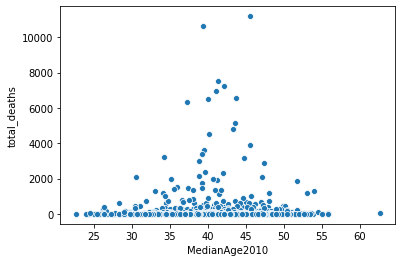

In [52]:
sns.scatterplot(x = data['MedianAge2010'], y = new_all_data['total_deaths'])

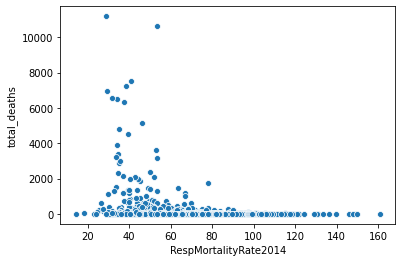

In [53]:
sns.scatterplot(x = new_all_data['RespMortalityRate2014'], y = new_all_data['total_deaths'])

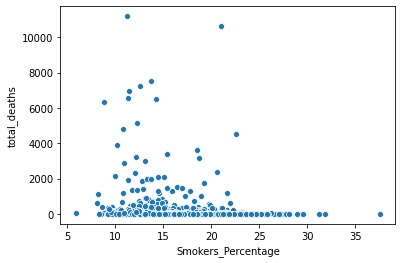

In [54]:
sns.scatterplot(x = new_all_data['Smokers_Percentage'], y = new_all_data['total_deaths'])

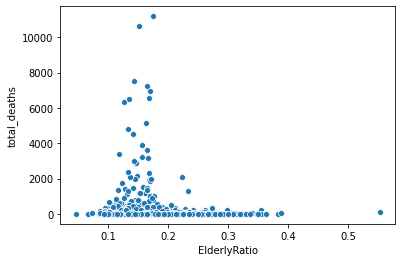

In [55]:
sns.scatterplot(x = new_all_data['ElderlyRatio'], y = new_all_data['total_deaths'])

### 5.2 Modeling Predictions 
#### 5.2.1 Demographic + VMT based Prediction

In [56]:
demo_data =  all_data.drop(all_data.loc[:, '1/22/20':'5/2/20'], axis=1)
demo_data.drop(columns = ['combined_key'], inplace = True)
demo_data

,PopulationDensityperSqMile2010,MedianAge2010,RespMortalityRate2014,Smokers_Percentage,ElderlyRatio,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,91.8,37.0,81.79,18.081557,0.150933,1.089195,1.016395,0.999595,0.974395,1.111595,1.570792,1.282394,1.145194,1.066795,0.993995,1.063995,1.178794,1.509193,1.111595,0.825996,0.817596,0.809196,0.786796,0.685997,0.615997,0.291199,0.253959,0.582397,0.562797,0.702797,0.680397,0.669197,0.498398,0.380798,0.517997,0.456398,0.515197,0.571197,0.604797,0.428398,0.259839,0.453598,0.467598,0.425598,0.523597,0.515197,0.422798,0.215599,0.467598,0.517997,0.551597,0.587997,0.635597,0.548797,0.264599,0.481598,0.610397,0.629997,0.503998,0.680397,0.545997,0.473198,0.618797,0.671997,0.587997,0.674797,0.865196
1,114.7,41.1,54.28,17.489033,0.194535,1.307796,1.080595,1.102761,1.041804,1.130468,1.451876,1.224674,1.141551,1.019638,1.003013,1.080595,1.163717,1.374295,1.036262,0.936515,0.847851,0.759187,0.703772,0.664981,0.565234,0.320853,0.325287,0.526443,0.506494,0.495965,0.524227,0.565234,0.463824,0.343574,0.461608,0.441658,0.502061,0.497628,0.520348,0.385135,0.240502,0.366848,0.400651,0.387906,0.430575,0.448308,0.394556,0.218336,0.390676,0.455512,0.493194,0.477678,0.545839,0.422817,0.292038,0.467149,0.512590,0.517023,0.422263,0.592942,0.559693,0.466041,0.553597,0.570776,0.500398,0.659440,0.814602
2,31.0,39.0,69.82,21.999985,0.191190,0.970523,0.930910,1.049750,1.155385,0.957319,1.419473,1.353451,1.538312,1.003534,1.029943,1.228009,1.399666,1.419473,1.194998,0.825275,0.930910,0.851684,0.990330,0.739446,0.686629,0.439706,0.332091,0.578353,0.652957,0.686629,0.693231,0.713037,0.593538,0.470077,0.540060,0.517612,0.524875,0.547322,0.578353,0.407356,0.250884,0.505068,0.491864,0.494505,0.582974,0.582314,0.422541,0.242961,0.540720,0.626549,0.633811,0.606742,0.706435,0.569770,0.272011,0.565148,0.680026,0.666822,0.421220,0.650317,0.539400,0.453571,0.591557,0.651637,0.619946,0.693231,1.043147
3,36.8,37.8,84.49,19.114200,0.162143,1.056475,0.988753,0.981980,0.968436,1.083564,1.327367,1.381545,1.097109,1.130970,1.130970,1.103881,1.239327,1.476357,1.124198,0.873624,0.981980,0.907485,0.941347,0.880396,0.731406,0.329133,0.336582,0.596638,0.641335,0.778812,0.812673,0.880396,0.644721,0.467964,0.615600,0.532978,0.611537,0.744951,0.724634,0.535010,0.315588,0.557358,0.539073,0.537719,0.644044,0.684000,0.575644,0.253283,0.551941,0.604764,0.684000,0.644044,0.744951,0.658265,0.247188,0.597315,0.704317,0.711089,0.602056,0.860079,0.738178,0.569549,0.673842,0.772040,0.632531,0.805901,1.049703
4,88.9,39.0,87.05,19.208672,0.178959,1.093608,0.996975,1.037042,1.128962,1.103036,1.376438,1.199670,1.029972,1.157245,1.128962,1.206740,1.204383,1.383509,1.074753,0.723573,0.806065,0.843775,0.791923,0.747142,0.622225,0.268688,0.245119,0.511450,0.584515,0.629296,0.669364,0.697647,0.560946,0.377106,0.591586,0.546804,0.608084,0.608084,0.702361,0.542090,0.296971,0.518521,0.582158,0.506737,0.615155,0.645795,0.492595,0.206230,0.499666,0.598656,0.683505,0.669364,0.758927,0.610441,0.332325,0.593942,0.704717,0.709431,0.572730,0.768354,0.612798,0.459598,0.657579,0.773068,0.685862,0.765997,0.963978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [57]:
demo_data_mean = demo_data.mean(axis = 0)
demo_data_std = demo_data.std(axis = 0)
demo_data_normalized = (demo_data - demo_data_mean) / demo_data_std
demo_data_normalized['5/2/20'] = all_data.loc[:, ['5/2/20']]

demo_train, demo_test = train_test_split(demo_data_normalized, test_size = 0.2, 
                                                           random_state = 100)
demo_train_x = demo_train.drop(columns = ['5/2/20'])
demo_train_y = demo_train['5/2/20']
demo_test_x = demo_test.drop(columns = ['5/2/20'])
demo_test_y = demo_test['5/2/20']

#### 5.2.1.1 Linear Regression Without Regularization

In [58]:
from sklearn.linear_model import LinearRegression

demo_model_1 = LinearRegression()
demo_model_1.fit(demo_train_x, demo_train_y)
demo_train_y_hat = demo_model_1.predict(demo_train_x)
demo_train_mse = mean_squared_error(demo_train_y, demo_train_y_hat)
demo_train_mse

0.19359711362998738

In [59]:
demo_test_y_hat = demo_model_1.predict(demo_test_x)
demo_test_mse = mean_squared_error(demo_test_y, demo_test_y_hat)
demo_test_mse

0.05982134465429245

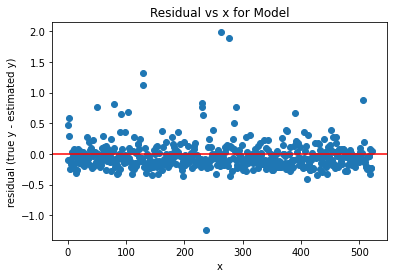

In [60]:
residual_plot(demo_test_x, demo_test_y, demo_test_y_hat)

#### 5.2.1.2 Linear Regression With Ridge Regularization

In [61]:
from sklearn.linear_model import Ridge

demo_model_2 = Ridge(alpha = 1.0)
demo_model_2.fit(demo_train_x, demo_train_y)
demo_train_y_hat = demo_model_2.predict(demo_train_x)
demo_train_mse = mean_squared_error(demo_train_y, demo_train_y_hat)
demo_train_mse

0.19359718207624593

In [62]:
demo_test_y_hat = demo_model_2.predict(demo_test_x)
demo_test_mse = mean_squared_error(demo_test_y, demo_test_y_hat)
demo_test_mse

0.05977496813328234

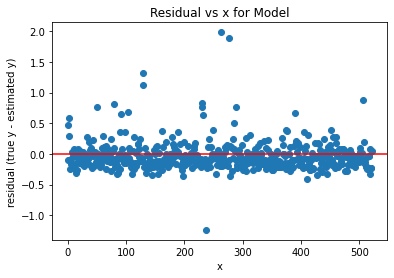

In [63]:
residual_plot(demo_test_x, demo_test_y, demo_test_y_hat)

### 5.3 Plotting more state-level heatmaps 

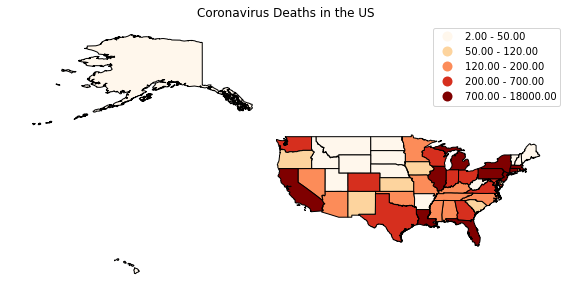

In [64]:
#Number of Deaths
deaths_map = states_complete.plot(column = 'Deaths', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined',
                                  classification_kwds = {'bins': [50, 120, 200, 700, 18000]},
                                                          figsize = (10, 10) )
deaths_map.set_title('Coronavirus Deaths in the US')
deaths_map.set_axis_off()

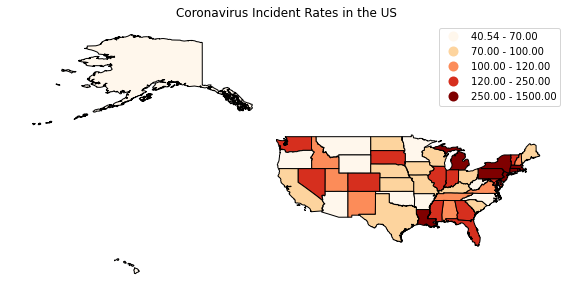

In [65]:
#Incident Rate
incident_map = states_complete.plot(column = 'Incident_Rate', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined', 
                                  classification_kwds = {'bins': [70, 100, 120, 250, 1500]},
                                  figsize = (10, 10) )
incident_map.set_title('Coronavirus Incident Rates in the US')
incident_map.set_axis_off()

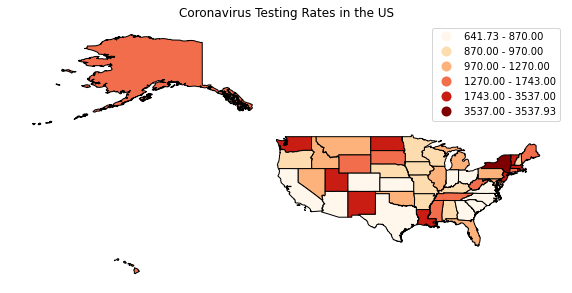

In [66]:
#Testing Rates
testing_map = states_complete.plot(column = 'Testing_Rate', cmap = 'OrRd', legend = True, 
                                  edgecolor = 'black', scheme='user_defined',
                                  classification_kwds = {'bins': [870, 970, 1270, 1743, 3537]},
                                  figsize = (10, 10) )
testing_map.set_title('Coronavirus Testing Rates in the US')
testing_map.set_axis_off()